지도학습(분류)

- 결정 트리 모델
> 왜 이렇게 분류했는지 정확하게 알 수 있음!(모델 설명 가능)

=> 머신러닝, 딥러닝 문제점 => XAI(설명가능한 에이아이)

와인 데이터
- 레드 와인, 화이트 와인 분류
- 당도, 알콜, pH, 클래스(정답)

### 1. 데이터 로드

In [1]:
import pandas as pd

wine = pd.read_csv('http://bit.ly/wine_csv_data')

In [2]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


### 2. 탐색적 데이터 분석

In [3]:
# 와인 6497개 샘플- 전체데이터셋
# 4가지(알콜, 당도, pH, 클래스): 실수값- 특징
# 누락된 값 없음(결측치 존재 X)- 결측치
wine.info() # 아래의 표를 주면 이 4가지를 서술해야 한다.-시험!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
# 알콜, 당도, pH, 특징의 min, max값 크기가 다 다르므로 정규화가 필요
wine.describe() #수치형 데이터의 특징값을 알려줌

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


### 3. 데이터 전처리

In [5]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

print(type(data))
print(type(target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
# train / test 데이터 분리
from sklearn.model_selection import train_test_split

# 8:2 비율로 분리
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state=42)

In [7]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [8]:
# 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 4. 결정 트리 모델
- 분류결과 설명 가능한 모델

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

# 과대적합 됨

0.996921300750433
0.8592307692307692


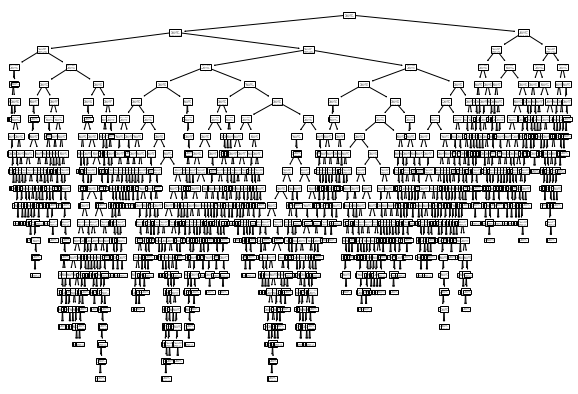

In [10]:
# 트리 모델 시각화 # 분류이므로 정답이 있어야 함
# - 트리모델은 나무 거꾸로 한 현상(아래로 갈수록 가지치기)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

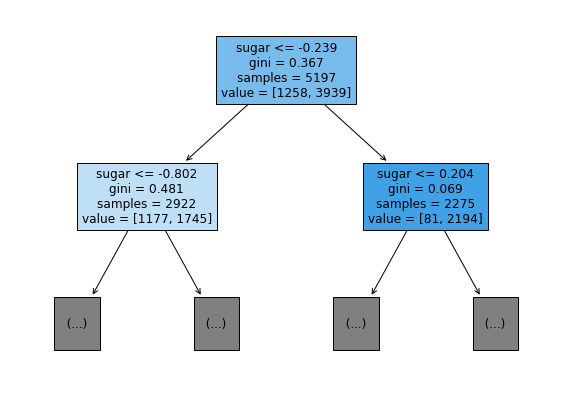

In [11]:
plt.figure(figsize=(10, 7))

plot_tree(dt,
          max_depth=1,
          filled=True,
          feature_names=['alochol', 'sugar','pH'])
plt.show()

### 불순도(gini 계수) > 서술형(지니 불순도가 무엇을 뜻하는가)
$지니불순도=1-(음성클래스비율^2+양성클래스비율^2)$

- 지니계수의 값은 0~0.5
- 0.5면 최악(클래스가 모두 동일)
- 0이면 순수 노드(하나의 클래스로 분류 됨)
- 가지를 쳤을 때 불순도값이 줄어드는 방향으로 학습
- 끝에 도달하면 원하는 카테고리로 완벽하게 분류가 됨


- gini = 불순도
- ex) 빨강공만 모아야 하는데 파란공이 하나 있음 -> 이것이 불순도
- gini계수가 높을수록 잡음이 많은 것


### 트리모델의 가지치기 방법 # 트리모델에서 가지치기 하는 이유(서술형)

> 문제점: 현재처럼 가지치기를 하지 않고 학습하면, 가지가 계속 뻗어나서 일반화 된 모델이 안나옴!

> 가지치기의 방법을 사용하면 과적합되지 않고 일반화 된 모델이 나옴!

> 가지치기: 자라 날 수 있는 트리의 최대 깊이를 지정해 주는 것

In [12]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


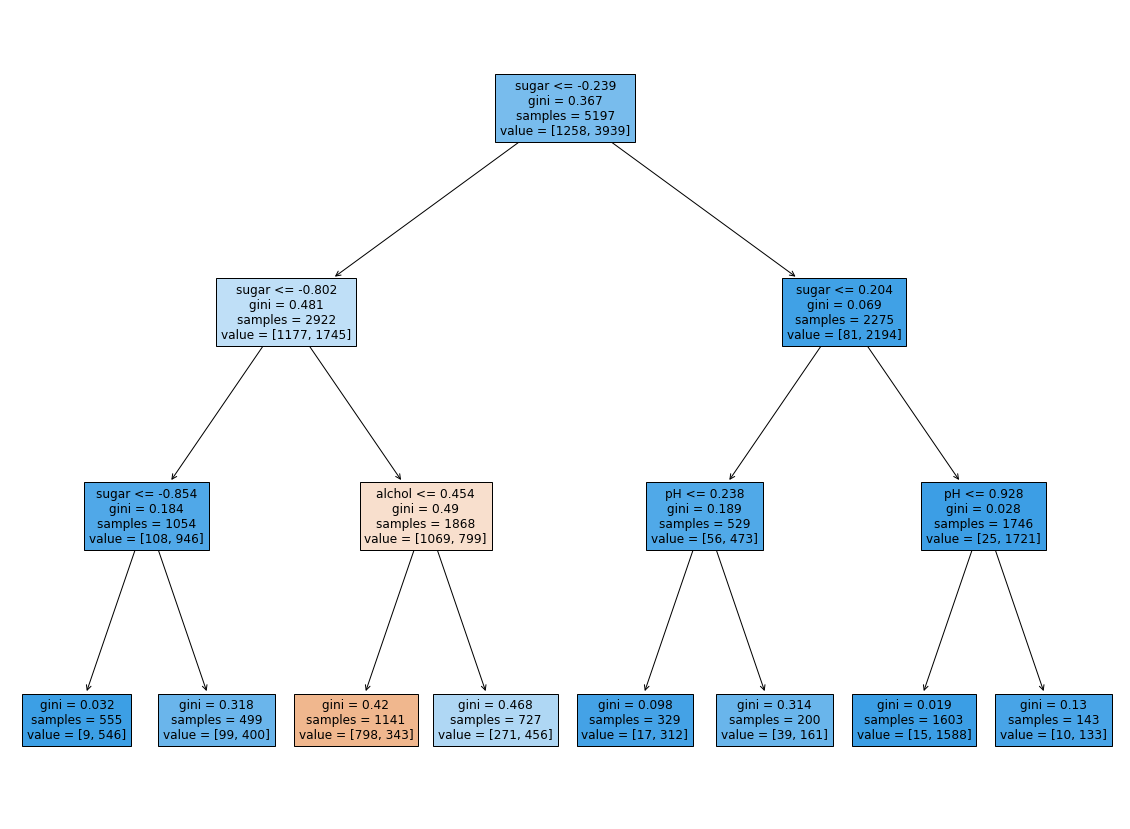

In [13]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alchol', 'sugar', 'pH'])
plt.show()

# 맨 마지막 가지의 gini계수를 보면 0.032 즉 불순도가 거의 없음 
# 분류를 했지만 gini계수가 0.42, 0.468로 분류가 잘 되지 않았음

In [14]:
# 결정 트리 모델은 특징의 정규화가 필요 없음(특징을 하나만 보기 때문에)
# - 트리 모델은 불순도(gini) 즉 클래스 비율로 계산하기 때문

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

# *_scaled : 정규화 된 값
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

# k-nn모델과 같은 경우 특징인 무게와 길이 값이 동시에 필요 -> 정규화가 필요
# 트리모델과 같은 경우 특징을 당도만 씀 -> 특징값을 여러개 주더라도 하나만 씀 -> 정규화가 필요 없음 

0.8454877814123533
0.8415384615384616


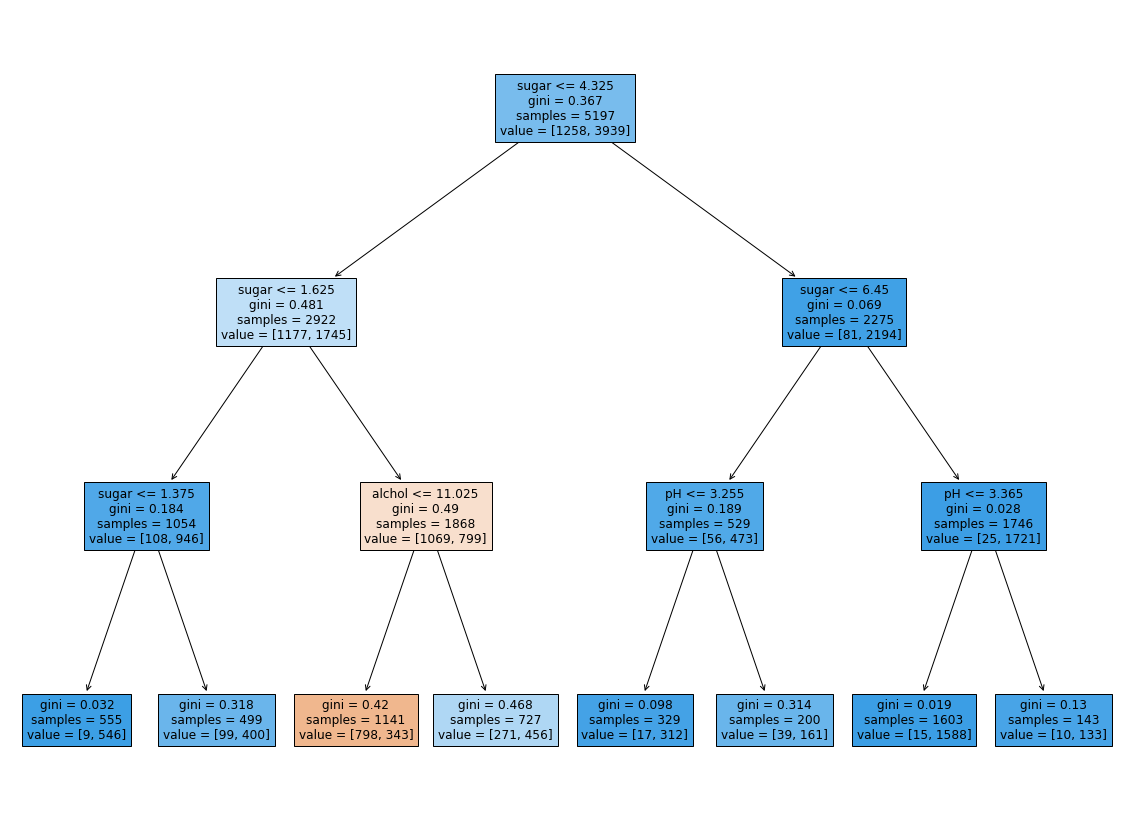

In [15]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alchol', 'sugar', 'pH'])
plt.show()

### 트리모델의 단점
- 과적합(학습데이터에서만 성능이 잘나옴)으로 알고리즘 성능 저하(->트리의 크기를 사전에 제한하는 가지치기가 필수!)
- 한번에 하나의 변수만 고려(변수간 상호작용 파악 어려움) - 특징 하나값만 봄
- 약간의 차이에 따라 트리 모양이 많이 달라짐( 두 변수가 비슷한 수준의 정보력, 약간의 차이로 다른 변수가 선택되면 이후의 트리 구성이 크게 달라짐)


> 이러한 단점을 보완하는 "랜덤 포레스트" 등장

> 앙상블 기법에 속함: 랜덤포레스트 - 시험!

##### 랜덤 포레스트
- 똑같은 트리 모델을 여러 개 그려놓고 투표를 하는 것
- 나무가 여러개가 모여 포레스트가 됨
- 트리마다 랜덤하게 뽑으므로 나무도 다 다른 나무로 그려짐(랜덤)
- 기존의 데이터에서 랜덤하게 뽑아가지고 트리를 여러 개 그린 것이 랜덤 포레스트

### 5. 검증세트(Valid Set) 왜 이용하는지- 시험!

기존 방법: Train(8) : Test(2) => 결과
  - Train결과 / Test결과 => 과대적합, 과소적합 => 더 나은 성능
  - 문제점: 모델 튜닝(Test 데이터 활용)
  
NEW 방법: Train(6) : Valid(2) : Test(2)
  - Train => Train과 Valid로 분리해서 활용
  - Test는 전혀 사용하지 않음(검증에만 활용)

In [16]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [17]:
# Train(8) : Test(2)
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state=42)

In [18]:
# Train(8) => Train(6) : Valid(2)
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [19]:
print(sub_input.shape, val_input.shape, test_input.shape)

(4157, 3) (1040, 3) (1300, 3)


In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

# test는 한번도 안씀 => 맨 마지막에 검증할때만 사용
# 과대적합(train이 높은 것)이 나옴

0.9971133028626413
0.864423076923077


### 6. 교차검증(cross validation)

- valid 세트 생성하느라 Train 세트 크기가 줄어듬
- 보통 많은 데이터를 훈련할수록 좋은 모델이 만들어짐
- 그렇다고 검증 세트를 너무 적게 떼면 검증 점수가 들쑥 날쑥

> 교차검증 사용하면 해결 가능!

> 교차검증: Test는 그대로 두고, Train 세트를 3-fold와 같이 나눠서 1개 set를 valid로 사용하는 방법(보통 5-fold, 10-fold 많이 사용)

##### 목표: 좋은 모델 !!!
- 양질의 데이터 많이 필요

예시) 총 데이터 500명

simple => 300명(Train), 100명(Valid),100명(Test)

cross => 400명, 100명(Test)
         
> 4-fold => 100명 - 1  1평가: 1, 2, 3 (햑습), 4 (valid)
>
>           100명 - 2  2평가: 1, 2, 4 (학습), 3 (valid)
>           
>           100명 - 3  3평가: 1, 3, 4 (학습), 2 (valid)
>           
>           100명 - 4  4평가: 2, 3, 4 (학습), 1 (valid)
           

In [26]:
from sklearn.model_selection import cross_validate

# default => 5-fold
# fit     => Train
# score   => Valid
# test    => Test
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00598335, 0.00498581, 0.00598359, 0.00598335, 0.00498986]), 'score_time': array([0.        , 0.00099826, 0.00099683, 0.        , 0.        ]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [27]:
import numpy as np

# 평균점수
print(np.mean(scores['test_score']))

0.855300214703487
